# 1 - Import all the necessary Libraries

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 2 - Import the Data

In [5]:
car_df = pd.read_csv("Cars.csv")

In [3]:
car_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# 3 - Data Understanding

In [5]:
car_df.shape

(81, 5)

In [6]:
car_df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [7]:
car_df.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [8]:
car_df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


<Axes: xlabel='MPG', ylabel='Count'>

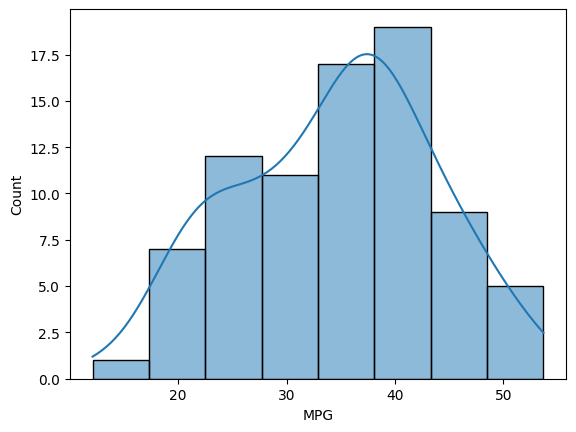

In [24]:
sns.histplot(car_df["MPG"], kde=True)

# 4 - Assumption Check

# Assumption_1 Linearity Test

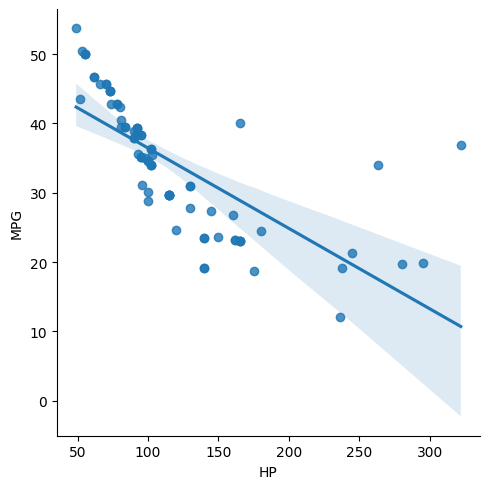

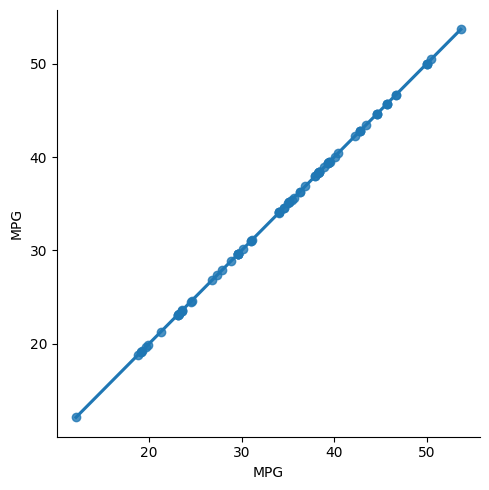

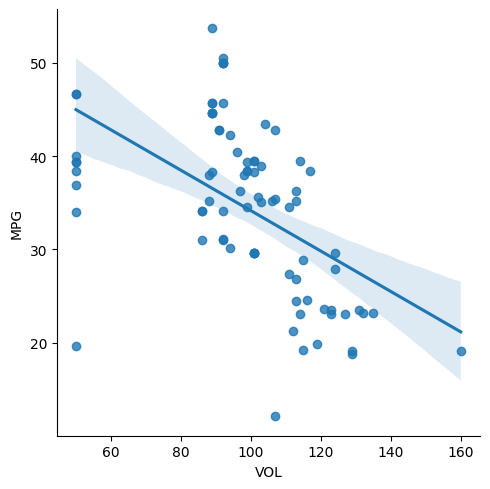

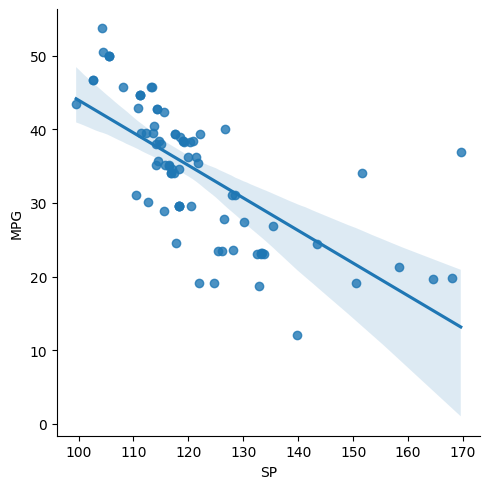

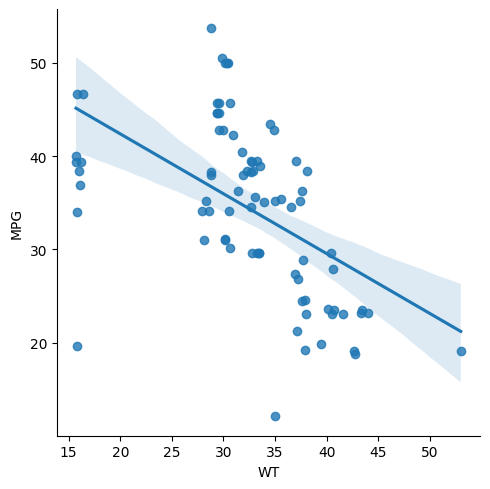

In [31]:
for i in car_df.columns:
    sns.lmplot(data=car_df, x=i, y="MPG")

# Linearity Test Failed

# Assumption_2 No Multicollinearity

In [38]:
corr_report = car_df.corr()

In [35]:
corr_report

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


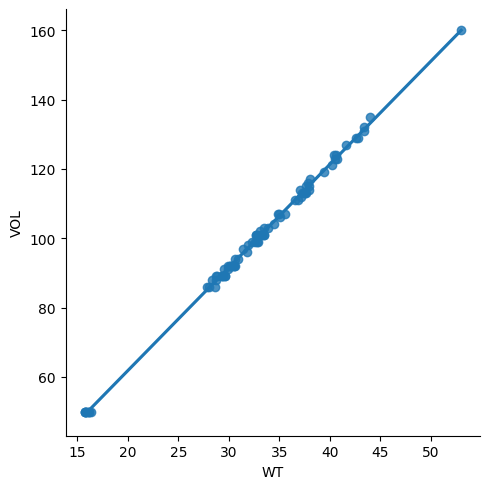

In [36]:
sns.lmplot(data=car_df, x="WT", y="VOL")

<Axes: >

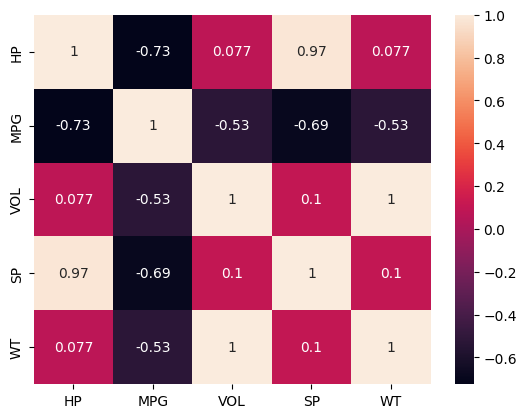

In [37]:
sns.heatmap(corr_report, annot=True)

# No Multicollinearity Failed

# Assumption_3 No AutoRegression Passed

# 5 - Data Prepration

In [44]:
x = car_df.drop(labels="MPG", axis=1)

In [45]:
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [48]:
y = car_df[["MPG"]]

In [49]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


# 6 - Model Building

In [50]:
model = LinearRegression()

# 7 - Model Training

In [51]:
model.fit(x, y)

LinearRegression()

In [53]:
model.intercept_

array([30.67733585])

In [54]:
model.coef_

array([[-0.20544372, -0.33605084,  0.39562692,  0.40057409]])

# 8 - Model Testing

In [56]:
y_pred = model.predict(x)

In [57]:
y_pred

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

In [58]:
car_df["MPG"]

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
76    36.900000
77    19.197888
78    34.000000
79    19.833733
80    12.101263
Name: MPG, Length: 81, dtype: float64

In [59]:
mean_absolute_error(car_df["MPG"], y_pred)

3.267968285420799

In [60]:
r2_score(car_df["MPG"], y_pred)

0.7705372737359844

# Assumption_4 Homoscedasticity

In [61]:
error = y - y_pred

In [62]:
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


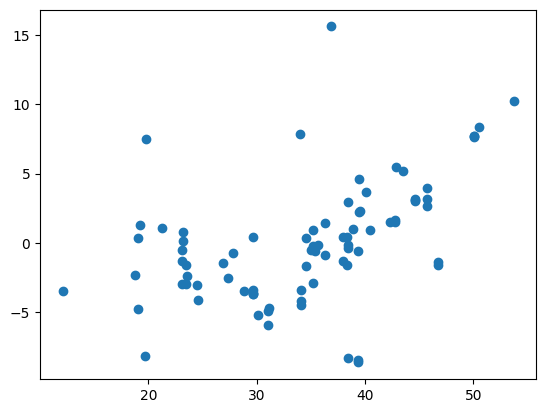

In [67]:
plt.scatter(x=car_df["MPG"], y=error)

# Homscedasticity Failed

# Assumption_5 Zero Residual Mean 

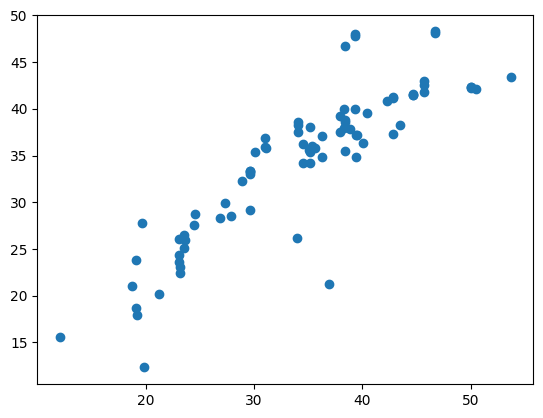

In [68]:
plt.scatter(x=y, y=y_pred)

# Zero Residual Mean Failed

# StatsModels

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\anbuu\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [13]:
import statsmodels.formula.api as smf

In [14]:
model_1 = smf.ols(formula="MPG~HP+VOL+SP+WT", data=car_df).fit()

In [16]:
model_1.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

# AIC
## The Akaike information criterion (AIC) is a mathematical method used to evaluate the quality of a model in regression analysis
## A lower AIC indicates a better model

In [30]:
model_1.aic

477.92790493548785

# BIC
## Bayesian Information Criterion (BIC) is a model selection technique used to evaluate linear regression models by balancing the model's complexity and goodness of fit
## A lower BIC indicates a better balance between model and complexity

In [31]:
model_1.bic

489.90015070885005

# R-squared
## A statistical measure that indicates how well a regression line fits a set of data
## The higher the R-squared, the better the model fits your data 
### Coefficient of determination(r2) = 1 - RSS/TSS 

In [33]:
model_1.rsquared

0.7705372737359844

# Adjusted R-squared
## Adjusted R-squared is a statistical measure that penalizes the R-squared value when additional variables are added to a model
## A lower adjusted R-squared indicateds that the additional input variable are not adding value to a model.
## The higher the R-squared, the better the model fits your data

In [36]:
model_1.rsquared_adj

0.7584602881431415

<Axes: >

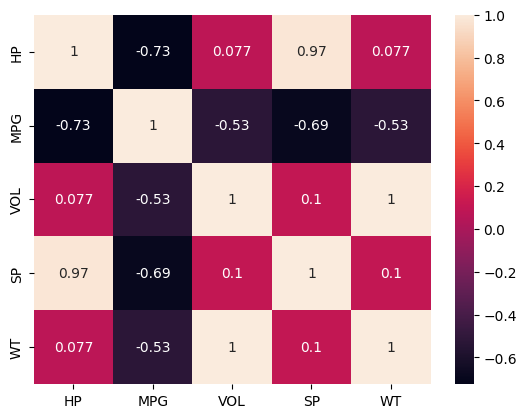

In [39]:
sns.heatmap(data=corr_report, annot=True)

In [41]:
model_1 = smf.ols(formula="MPG~HP", data=car_df).fit()
print("AIC", model_1.aic)
print("BIC", model_1.bic)
print("r2", model_1.rsquared)
print("r2_adj", model_1.rsquared_adj)

AIC 530.7452702659343
BIC 535.5341685752792
r2 0.5256806086282022
r2_adj 0.5196765656994453


In [43]:
model_1 = smf.ols(formula="MPG~VOL", data=car_df).fit()
print("AIC", model_1.aic)
print("BIC", model_1.bic)
print("r2", model_1.rsquared)
print("r2_adj", model_1.rsquared_adj)

AIC 564.5634161305575
BIC 569.3523144399023
r2 0.27990086511227064
r2_adj 0.27078568618964105


In [44]:
model_1 = smf.ols(formula="MPG~SP", data=car_df).fit()
print("AIC", model_1.aic)
print("BIC", model_1.bic)
print("r2", model_1.rsquared)
print("r2_adj", model_1.rsquared_adj)

AIC 539.408199092848
BIC 544.1970974021929
r2 0.4721402334141218
r2_adj 0.46545846421683224


In [45]:
model_1 = smf.ols(formula="MPG~WT", data=car_df).fit()
print("AIC", model_1.aic)
print("BIC", model_1.bic)
print("r2", model_1.rsquared)
print("r2_adj", model_1.rsquared_adj)

AIC 564.8358142145094
BIC 569.6247125238542
r2 0.2774751389270127
r2_adj 0.2683292546096331


In [48]:
model_1 = smf.ols(formula="MPG~HP+SP", data=car_df).fit()
print("AIC", model_1.aic)
print("BIC", model_1.bic)
print("r2", model_1.rsquared)
print("r2_adj", model_1.rsquared_adj)

AIC 531.5481466080848
BIC 538.7314940721021
r2 0.5326391712851648
r2_adj 0.5206555602924767


In [49]:
model_1 = smf.ols(formula="MPG~HP+VOL", data=car_df).fit()
print("AIC", model_1.aic)
print("BIC", model_1.bic)
print("r2", model_1.rsquared)
print("r2_adj", model_1.rsquared_adj)

AIC 480.65692370523766
BIC 487.84027116925495
r2 0.7506606277376424
r2_adj 0.744267310500146


In [63]:
model_1 = smf.ols(formula="MPG~HP+WT", data=car_df).fit()
print("AIC", model_1.aic)
print("BIC", model_1.bic)
print("r2", model_1.rsquared)
print("r2_adj", model_1.rsquared_adj)

AIC 481.16318962229695
BIC 488.34653708631424
r2 0.749097327285768
r2_adj 0.7426639254213006


In [64]:
model_1 = smf.ols(formula="MPG~SP+VOL", data=car_df).fit()
print("AIC", model_1.aic)
print("BIC", model_1.bic)
print("r2", model_1.rsquared)
print("r2_adj", model_1.rsquared_adj)

AIC 499.6151150749222
BIC 506.7984625389395
r2 0.684907371407872
r2_adj 0.676828073238843


In [70]:
model_1 = smf.ols(formula="MPG~HP+SP+WT", data=car_df).fit()
print("AIC", model_1.aic)
print("BIC", model_1.bic)
print("r2", model_1.rsquared)
print("r2_adj", model_1.rsquared_adj)

AIC 476.29927501529767
BIC 485.87707163398744
r2 0.7694828139983458
r2_adj 0.7605016249333464


In [57]:
model_1 = smf.ols(formula="MPG~HP+SP+WT+VOL", data=car_df).fit()
print("AIC", model_1.aic)
print("BIC", model_1.bic)
print("r2", model_1.rsquared)
print("r2_adj", model_1.rsquared_adj)

AIC 477.9279049354879
BIC 489.9001507088501
r2 0.7705372737359842
r2_adj 0.7584602881431413


In [71]:
model_f1 = smf.ols(formula="MPG~HP+SP+WT", data=car_df).fit()
print("AIC", model_f1.aic)
print("BIC", model_f1.bic)
print("r2", model_f1.rsquared)
print("r2_adj", model_f1.rsquared_adj)

AIC 476.29927501529767
BIC 485.87707163398744
r2 0.7694828139983458
r2_adj 0.7605016249333464


In [ ]:
# 0.7694828139983458

# Data transformation techniques if the data is CONTINUOUS:
Log Transformation

Square Root Transformation

Cube Root Transformation

Reciprocal Transformation

Boxcox Transformation

Standard Scaler

Min Max Scaler

Robust Scaler

#  Data transformation techniques if the data is DISCRETE:
Label Encoding

One Hot Encoding

In [73]:
car_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [6]:
car_df1 = car_df.copy()

In [7]:
car_df1["log_hp"] = np.log(car_df1["HP"])

In [8]:
car_df1

,HP,MPG,VOL,SP,WT,log_hp
0,49,53.700681,89,104.185353,28.762059,3.891820
1,55,50.013401,92,105.461264,30.466833,4.007333
2,55,50.013401,92,105.461264,30.193597,4.007333
3,70,45.696322,92,113.461264,30.632114,4.248495
4,53,50.504232,92,104.461264,29.889149,3.970292
...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552
77,238,19.197888,115,150.576579,37.923113,5.472271
78,263,34.000000,50,151.598513,15.769625,5.572154
79,295,19.833733,119,167.944460,39.423099,5.686975


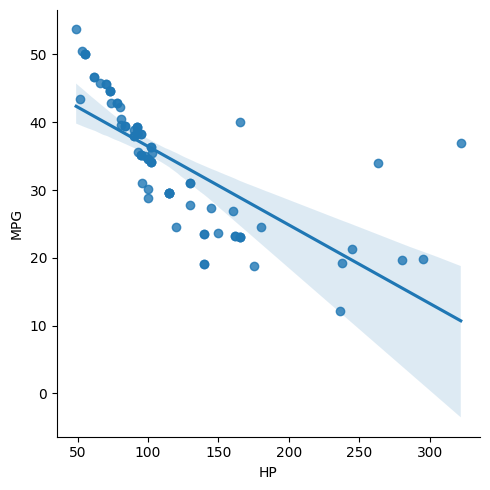

In [7]:
sns.lmplot(data=car_df1, x="HP", y="MPG")

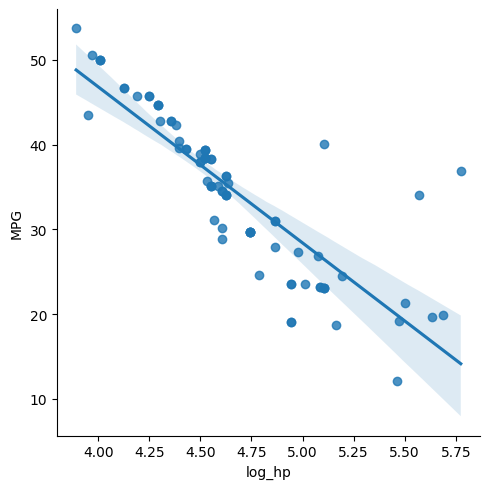

In [8]:
sns.lmplot(data=car_df1, x="log_hp", y="MPG")

<Axes: >

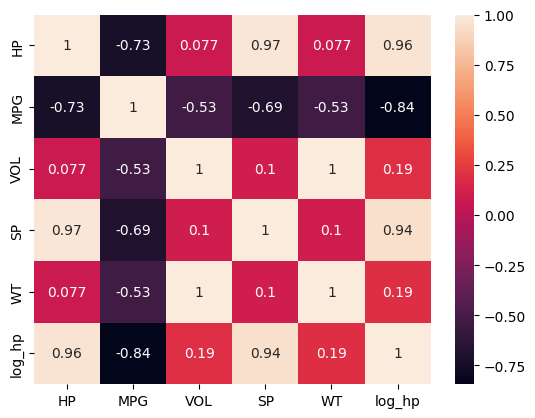

In [9]:
sns.heatmap(car_df1.corr(), annot=True)

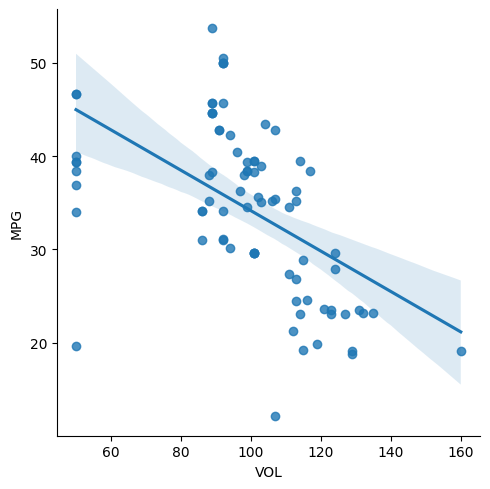

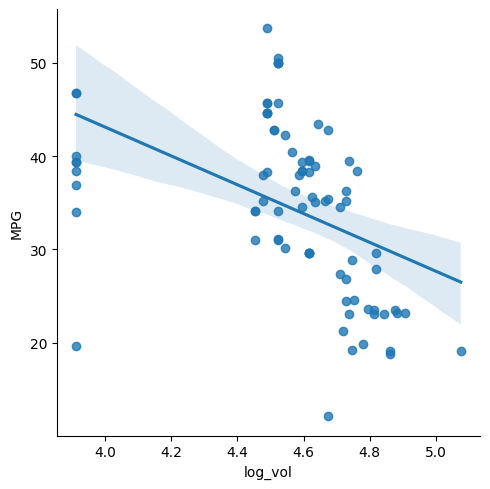

<Axes: >

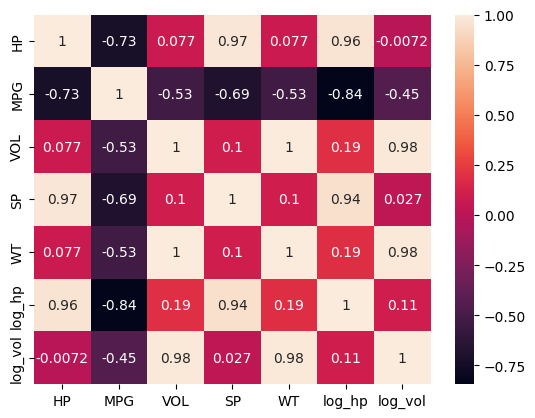

In [9]:
car_df1["log_vol"] = np.log(car_df1["VOL"])
sns.lmplot(data=car_df1, x="VOL", y="MPG")
plt.show()
sns.lmplot(data=car_df1, x="log_vol", y="MPG")
plt.show()
sns.heatmap(car_df1.corr(), annot=True)

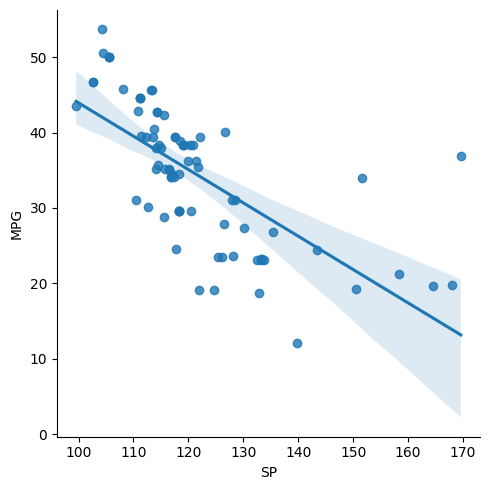

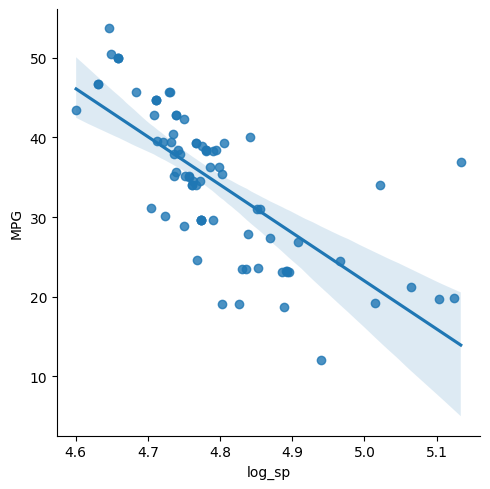

<Axes: >

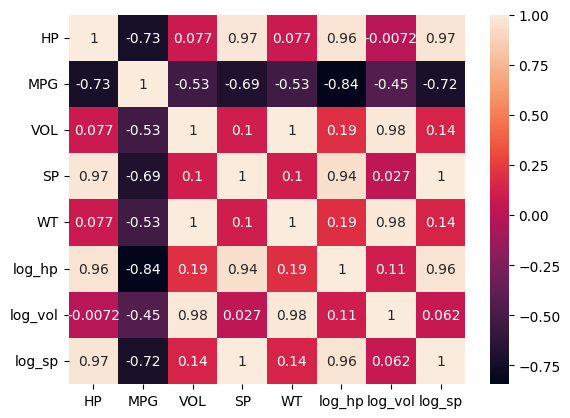

In [10]:
car_df1["log_sp"] = np.log(car_df1["SP"])
sns.lmplot(data=car_df1, x="SP", y="MPG")
plt.show()
sns.lmplot(data=car_df1, x="log_sp", y="MPG")
plt.show()
sns.heatmap(car_df1.corr(), annot=True)

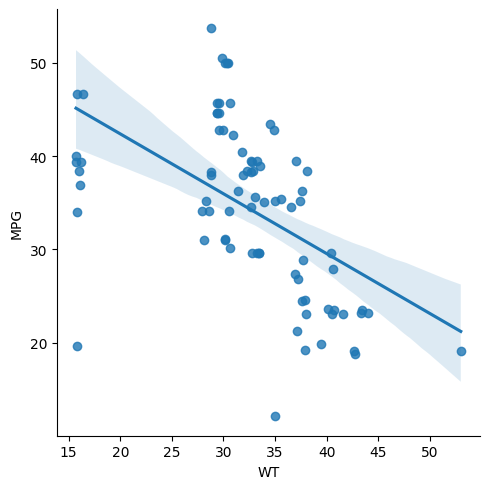

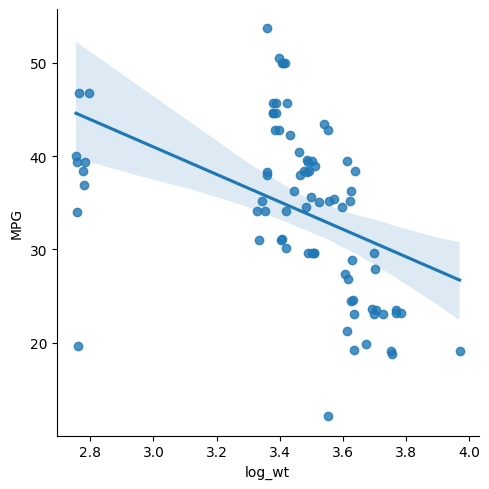

<Axes: >

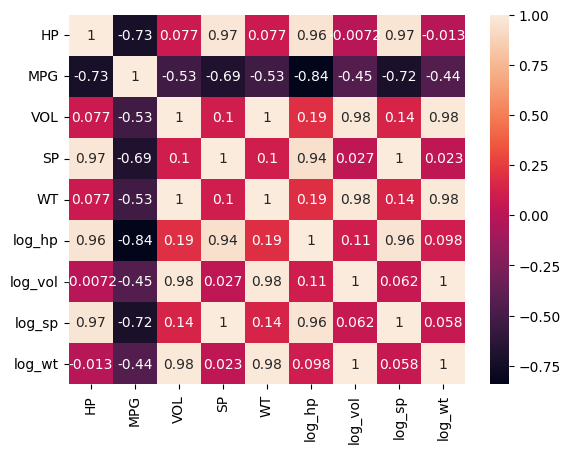

In [11]:
car_df1["log_wt"] = np.log(car_df1["WT"])
sns.lmplot(data=car_df1, x="WT", y="MPG")
plt.show()
sns.lmplot(data=car_df1, x="log_wt", y="MPG")
plt.show()
sns.heatmap(car_df1.corr(), annot=True)

In [14]:
model_2 = smf.ols(formula="MPG~log_hp", data=car_df1).fit()
print("AIC", model_2.aic)
print("BIC", model_2.bic)
print("r2", model_2.rsquared)
print("r2_adj", model_2.rsquared_adj)

AIC 490.4986085730722
BIC 495.28750688241706
r2 0.7114095515436409
r2_adj 0.7077565078922946


In [15]:
model_2 = smf.ols(formula="MPG~log_vol", data=car_df1).fit()
print("AIC", model_2.aic)
print("BIC", model_2.bic)
print("r2", model_2.rsquared)
print("r2_adj", model_2.rsquared_adj)

AIC 573.0814921857461
BIC 577.870390495091
r2 0.20004912250114748
r2_adj 0.1899231620264784


In [16]:
model_2 = smf.ols(formula="MPG~log_sp", data=car_df1).fit()
print("AIC", model_2.aic)
print("BIC", model_2.bic)
print("r2", model_2.rsquared)
print("r2_adj", model_2.rsquared_adj)

AIC 532.1442469181513
BIC 536.9331452274962
r2 0.5174173348052113
r2_adj 0.5113086934736317


In [17]:
model_2 = smf.ols(formula="MPG~log_wt", data=car_df1).fit()
print("AIC", model_2.aic)
print("BIC", model_2.bic)
print("r2", model_2.rsquared)
print("r2_adj", model_2.rsquared_adj)

AIC 573.689208547852
BIC 578.4781068571968
r2 0.19402478308187288
r2_adj 0.18382256514620032


In [18]:
model_2 = smf.ols(formula="MPG~log_hp+VOL+log_sp", data=car_df1).fit()
print("AIC", model_2.aic)
print("BIC", model_2.bic)
print("r2", model_2.rsquared)
print("r2_adj", model_2.rsquared_adj)

AIC 396.922831018059
BIC 406.5006276367488
r2 0.9134805433870519
r2_adj 0.9101096554670669


In [19]:
model_2 = smf.ols(formula="MPG~log_hp+log_vol+log_sp", data=car_df1).fit()
print("AIC", model_2.aic)
print("BIC", model_2.bic)
print("r2", model_2.rsquared)
print("r2_adj", model_2.rsquared_adj)

AIC 399.1034940191333
BIC 408.68129063782305
r2 0.9111196497498921
r2_adj 0.9076567789609269


In [20]:
model_f2 = smf.ols(formula="MPG~log_hp+VOL+log_sp", data=car_df1).fit()
print("AIC", model_f2.aic)
print("BIC", model_f2.bic)
print("r2", model_f2.rsquared)
print("r2_adj", model_f2.rsquared_adj)

AIC 396.922831018059
BIC 406.5006276367488
r2 0.9134805433870519
r2_adj 0.9101096554670669


In [21]:
y_stats_pred = model_f2.predict()

In [22]:
y_stats_pred

array([52.50818905, 48.89204579, 48.89204579, 45.77209264, 49.49863646,
       46.00269867, 48.89204579, 48.34505739, 48.34505739, 42.1673822 ,
       43.17478536, 44.49572302, 40.56747463, 43.17478536, 44.71901609,
       43.17478536, 42.65197164, 44.49572302, 42.65197164, 38.54140709,
       38.70693521, 39.98187783, 38.02881149, 40.26598674, 38.9902486 ,
       42.56295602, 37.26310209, 38.70693521, 44.93563374, 35.28268179,
       36.26784232, 37.2640766 , 35.81801441, 34.52909674, 37.89019993,
       37.01248866, 37.78768951, 35.42894759, 35.42894759, 33.01261744,
       33.91521523, 34.46335254, 34.95573323, 35.86216134, 34.88224977,
       34.47083629, 33.52158852, 34.23523555, 33.51605515, 29.97063887,
       29.97063887, 29.97063887, 28.13223341, 26.75838584, 26.65937872,
       27.40312427, 32.51923734, 29.97063887, 32.25459269, 31.28709897,
       27.52036961, 25.99807277, 23.58982725, 24.25251991, 23.7327376 ,
       29.20735553, 23.8019775 , 22.68552914, 23.02969395, 23.31

In [23]:
mean_absolute_error(car_df1["MPG"], y_stats_pred)

1.5953938252580717

# Detecting Influencers/Outliers
1. Cooks Distance
2. High Influence Points
1. Cooks Distance
Cook’s distance, is used in Regression Analysis to find influential outliers in a set of independent
variables.

In other words, it’s a way to identify points that negatively affect your regression model.

The measurement is a combination of each observation’s leverage and residual values.

The higher the leverage and residuals, the higher the Cook’s distance.

Several interpretations for Cook’s distance exist. There isn’t a universally accepted rule for cut off
points.

If you have a lot of points with large Cook's Distance values, that could indicate a problem with
your regression model in general.

In [25]:
model_f2_outliers = model_f2.get_influence()

In [28]:
dist,_ = model_f2_outliers.cooks_distance

In [29]:
dist

array([4.76197795e-03, 2.62846787e-03, 2.62846787e-03, 1.04294457e-05,
       2.26107737e-03, 1.59812312e-04, 2.62846787e-03, 1.10823286e-02,
       1.10823286e-02, 1.78880399e-05, 1.93448992e-03, 7.39214449e-02,
       2.46185959e-03, 1.93448992e-03, 1.12245392e-03, 1.93448992e-03,
       1.80830394e-05, 7.39214449e-02, 1.80830394e-05, 1.08067207e-04,
       6.60294076e-05, 7.65615616e-03, 6.31815538e-05, 2.89601772e-05,
       2.85776752e-04, 5.55441337e-02, 2.31040499e-03, 6.60294076e-05,
       4.43299747e-03, 1.01317646e-05, 8.69872064e-03, 3.07926699e-03,
       9.56689798e-05, 2.55419162e-03, 1.90109801e-03, 4.60195805e-04,
       2.04146288e-05, 1.54893839e-03, 1.54893839e-03, 2.57707249e-03,
       1.05219849e-03, 2.76424037e-04, 4.78715927e-04, 4.89194621e-04,
       3.79790937e-04, 4.32860307e-06, 6.37595958e-04, 3.67242737e-04,
       4.59776823e-03, 1.34975360e-04, 1.34975360e-04, 1.34975360e-04,
       2.51418201e-03, 1.15648190e-02, 3.96639417e-05, 2.12315459e-04,
      

<StemContainer object of 3 artists>

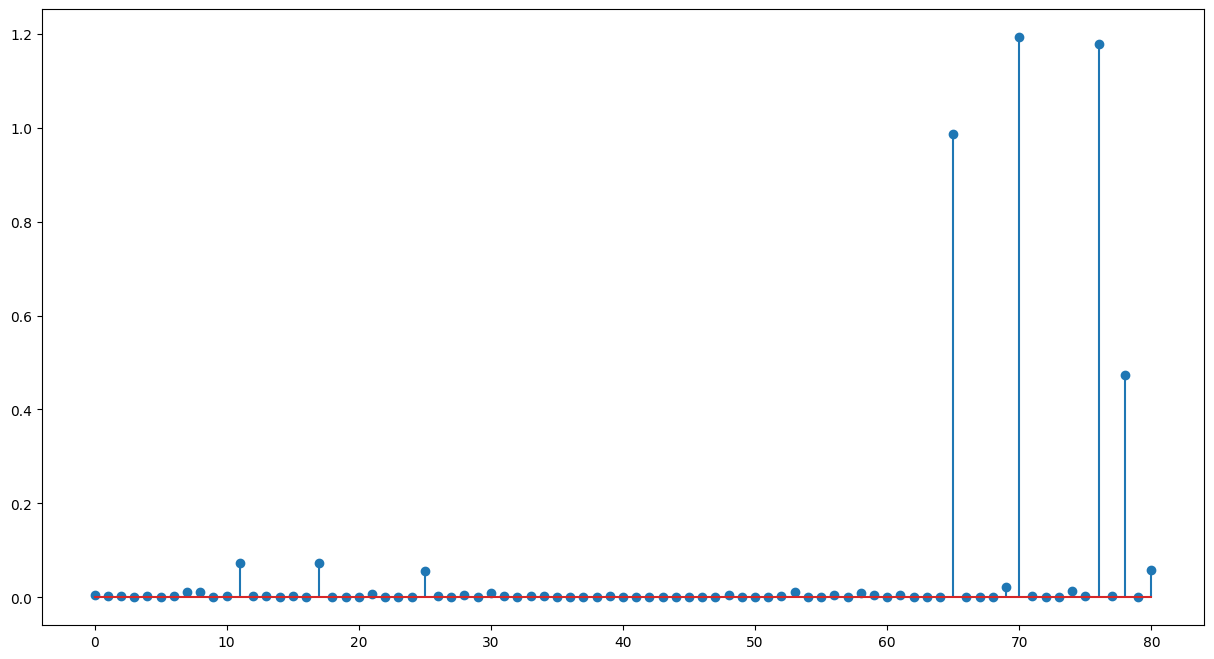

In [45]:
plt.figure(figsize=(15,8))
plt.stem(dist)

In [34]:
car_df1["dist"] = dist

In [35]:
car_df1

,HP,MPG,VOL,SP,WT,log_hp,log_vol,log_sp,log_wt,dist
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057,0.004762
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639,0.002628
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630,0.002628
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,0.000010
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495,0.002261
...,...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864,1.177456
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561,0.002527
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086,0.472693
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352,0.000889


In [37]:
car_df1.sort_values(by="dist", ascending=False)

,HP,MPG,VOL,SP,WT,log_hp,log_vol,log_sp,log_wt,dist
70,280,19.678507,50,164.598513,15.823060,5.634790,3.912023,5.103509,2.761468,1.192439
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864,1.177456
65,165,40.050000,50,126.598513,15.712859,5.105945,3.912023,4.841021,2.754479,0.985781
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086,0.472693
11,92,39.354094,50,117.598513,15.753535,4.521789,3.912023,4.767276,2.757065,0.073921
...,...,...,...,...,...,...,...,...,...,...
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,0.000010
29,103,35.404192,107,121.840817,35.549360,4.634729,4.672829,4.802715,3.570922,0.000010
62,140,23.515917,131,126.048103,43.390988,4.941642,4.875197,4.836664,3.770252,0.000009
68,165,23.103172,123,133.312342,40.472042,5.105945,4.812184,4.892695,3.700611,0.000007


In [38]:
from statsmodels.graphics.regressionplots import influence_plot

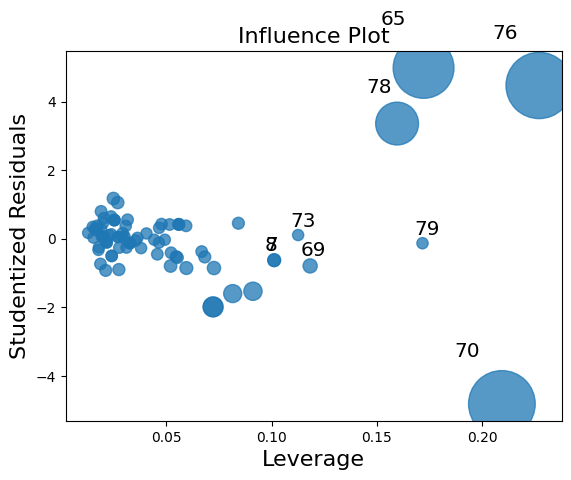

In [40]:
influence_plot(model_f2)
plt.show()

In [46]:
nods = car_df1.drop(labels=[70, 78, 65, 76])

In [47]:
nods

,HP,MPG,VOL,SP,WT,log_hp,log_vol,log_sp,log_wt,dist
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057,0.004762
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639,0.002628
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630,0.002628
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,0.000010
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495,0.002261
...,...,...,...,...,...,...,...,...,...,...
74,140,19.086341,129,121.864163,42.618698,4.941642,4.859812,4.802907,3.752293,0.014300
75,175,18.762837,129,132.864163,42.778219,5.164786,4.859812,4.889327,3.756029,0.002320
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561,0.002527
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352,0.000889


In [48]:
model_f2 = smf.ols(formula="MPG~log_hp+VOL+log_sp", data=nods).fit()
print("AIC", model_f2.aic)
print("BIC", model_f2.bic)
print("r2", model_f2.rsquared)
print("r2_adj", model_f2.rsquared_adj)

AIC 232.50088232418577
BIC 241.8761040116005
r2 0.9870260995889483
r2_adj 0.986492925599453


In [49]:
model_ff = smf.ols(formula="MPG~log_hp+VOL+log_sp", data=nods).fit()
print("AIC", model_f2.aic)
print("BIC", model_f2.bic)
print("r2", model_f2.rsquared)
print("r2_adj", model_f2.rsquared_adj)

AIC 232.50088232418577
BIC 241.8761040116005
r2 0.9870260995889483
r2_adj 0.986492925599453


In [54]:
y_pred_nod = model_ff.predict()

In [56]:
mean_absolute_error(nods["MPG"], y_pred_nod)

0.8076634355409664

In [57]:
error1 = nods["MPG"] - y_pred_nod

In [58]:
error1

0    -0.547717
1    -0.280909
2    -0.280909
3    -0.875606
4    -0.507652
        ...   
74   -2.263620
75   -0.749712
77    0.697231
79    1.159884
80   -0.987145
Name: MPG, Length: 77, dtype: float64

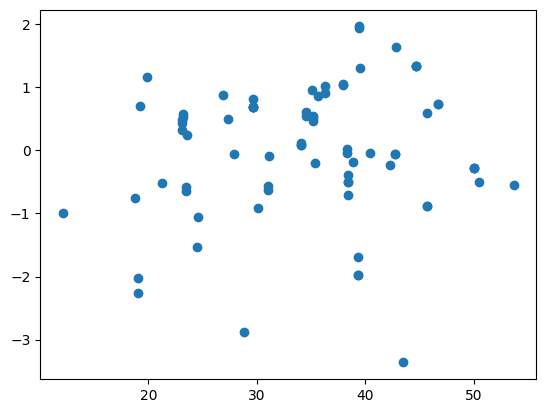

In [62]:
plt.scatter(x=nods["MPG"], y=error1)

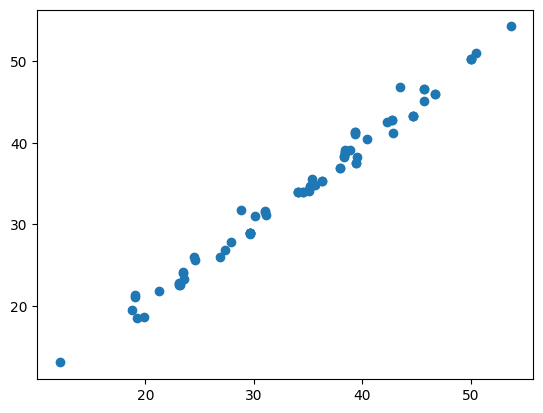

In [64]:
plt.scatter(x=nods["MPG"], y=y_pred_nod)

In [50]:
import pickle

In [52]:
pickle.dump(model_ff, open("MLR_model_pkl", "ab"))